3994


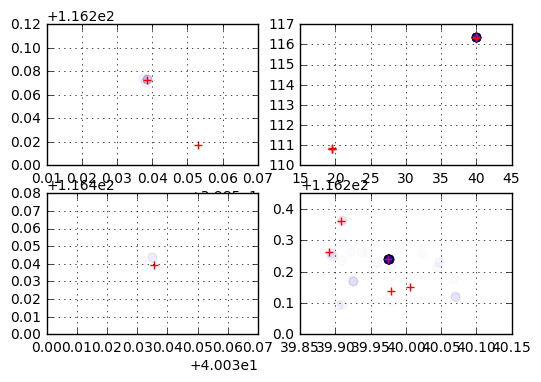

In [75]:
import scipy as sp
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline


rows = 2
cols = 2
count = 0
max_count = rows * cols
import random
init_count = random.randint(1, 34200)
print init_count
for l in open('merge.output'):
    count += 1
    if count < init_count:
        continue
        
    if count >= max_count + init_count:
        break
        
    uid, did, points, centers = l.strip().split()
    #print len(points), len(centers)
    def parse_points(points, max_count):
        points = [v.split(',') for v in points.split('|')]
        res = []
        for p in points:
            p = [float(v) for v in p]
            res.append(p)
        return np.array(res[:max_count])
    points = parse_points(points, 999)
    centers = parse_points(centers, 100)
    #print centers, points
    p = plt.subplot(rows, cols, count - init_count + 1)
    p.grid(True)
    p.scatter(points[:, 0], points[:, 1],s=40,alpha=0.01,marker='o',c='b')
    p.scatter(centers[:, 0], centers[:, 1],s=40,alpha=1,marker='+',c='r')
    
plt.show()


In [111]:
from collections import Counter

max_dist_sq = 0.01 ** 2
c = Counter()
count = 0
for l in open('merge.output'):
    count += 1
    if count >= 100000:
        break
        
    uid, did, points, centers = l.strip().split()
    
    points = [[float(x) for x in v.split(',')] for v in points.split('|')]
    centers = [[float(x) for x in v.split(',')] for v in centers.split('|')]
    
    if len(points) < 10:
        c['unknown'] += 1
        continue
        
    valid_center_count = 0
    for center in centers:
        valid_point_count = 0
        invalid_point_count = 0
        for p in points:
            if (center[0] - p[0]) ** 2 + (center[1] - p[1]) ** 2 < max_dist_sq:
                valid_point_count += 1
        if valid_point_count >= 3:
            valid_center_count += 1
        else:
            invalid_point_count += 1
    
    if valid_center_count >= 1:
        c['valid'] += 1
    else:
        c['invalid'] += 1

print '统计结果', c
print '准确率', 1.0 * c['valid'] / (c['valid'] + c['invalid'])
                
                

统计结果 Counter({'valid': 25729, 'invalid': 4552, 'unknown': 3996})
准确率 0.849674713517
